<a href="https://colab.research.google.com/github/mauney/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS6_131_Statistics_Probability_and_Inference_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [0]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [0]:
df.describe()

,a,b
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.162278
min,1.000000,2.000000
25%,2.000000,4.000000
50%,3.000000,6.000000
75%,4.000000,8.000000
max,5.000000,10.000000


# What is Inferential Statistics?

![Inferential Statistics](https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg)

![Variance Equation](https://standard-deviation-calculator.com/wp-content/uploads/2018/03/sample-variance-formula-descriptive-statistics-54-638-cb1374419364.jpg)

# Statistics, Probability and Inference

Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Why do we use the t-distribution in Hypothesis Tests?
* [Part 3](#p2): Student's T Test
* [Part 4](#p3): Hypothesis Test & Doing it Live

## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [0]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01

True

In [0]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

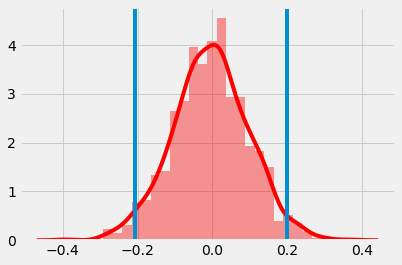

In [0]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0);

![The Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.png)

# Why do we use the t-distribution in hypothesis tests?

![t-distribution-low-dof](https://lambdachops.com/img/t-distribution-low-dof.png)

![t-distribution-approximates-normal](https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/t-distribution-approximates-normal.png?raw=true)

### Helpful video on why we use the t-distribution

<https://www.youtube.com/watch?v=Uv6nGIgZMVw>

However, in order to understand it you'll need to understand what a z-score is:

A z-score calculates the number of standard deviations an observations lies from the population mean. The problem is that in real-world situations, we don't know what the sample mean is, so we have to turn to using the sample mean to estimate the population mean. Because the sample mean is generated from a sample and used to estimate the population mean with some level of uncertainty, it also has its own distribution a nd spread. This means that for low sample sizes both our estimates of the sample mean and sample population are not very precise, they're kind of spread out. It's this spread that makes the t-distribution wider than the normal distribution for low sample sizes. However, with the larger the sample size, the closer the t-distribution approximates the normal distribution.


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)
t_df100000 = np.random.standard_t(df=1000, size=100000)

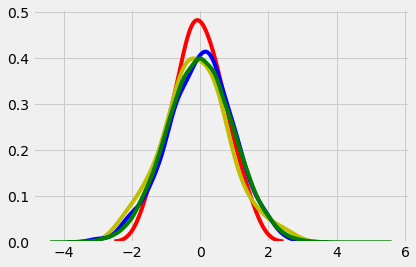

In [0]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');
sns.kdeplot(t_df100000, color='g');


In [0]:
i = 10
for sample in [t_df10, t_df100, t_df1000, t_df100000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.05031183160048543
Standard Deviation: 0.7078459132352878
Variance: 0.5010458368838986
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.11776171003752336
Standard Deviation: 0.9778228583041041
Variance: 0.956137542222008
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.0007369455601830061
Standard Deviation: 0.9683011190672908
Variance: 0.9376070571869676
t - distribution with 10000 degrees of freedom
------------------------------
Mean: 0.0002023105968205649
Standard Deviation: 0.9988007120215554
Variance: 0.9976028623347661


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!

from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

 Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. 

In [0]:
mu1 = 180
sigma1 = 5
n1 = 1000
sample1 = np.random.normal(mu1, sigma1, n1)

mu2 = 178.5
sigma2 = 4.25
n2 = 800
sample2 = np.random.normal(mu2, sigma2, n2)

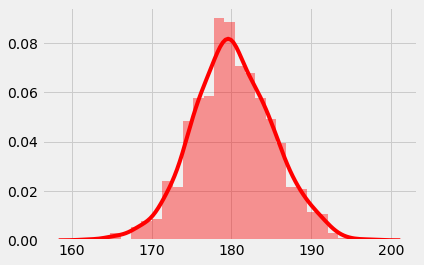

In [0]:
import seaborn as sns
ax = sns.distplot(sample1, color='r')

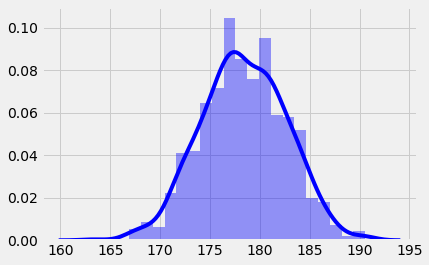

In [0]:
ax = sns.distplot(sample2, color='b')

## The Four Parts of a T-test

### Before:

1) Null Hypothesis: "The Boring Hypothesis", "The default state of the world"

 - The cooking times between the two burners is the same: $\mu_{1} = \mu_{2}$

2) Alternative Hypothesis: "The opposite of the null hypothesis"

- The cooking times are different $\mu_{1} \neq \mu_{2}$

3) Confidence Level: 95%

**Confidence level of 95%** (reach an incorrect conclusion only 5% of the time)

p < 1 - Confidence Level

1 - Confidence Level = $\alpha$

- I reject the null hypothesis when P-value < alpha (1 - Confidence Level)

In [0]:
ttest_ind(sample1, sample2)

Ttest_indResult(statistic=8.018607112168876, pvalue=1.9081548642662962e-15)

### After:

4) T-statistic: 6.362

5) P-value: .000000000251

What is the t-statistic?: ~Roughly the number of standard deviations away from the mean, that corresponds to the differences in means that we have observed given their sample sizes. 

What is the P-value: The probability that the difference that we have observed (The t-statist that we get) could have happened by random chance. 

### Interpretation: 

Due to calculating a t-statistic of 6.362 which corresponds to a p-value of .000000000251, we reject the null hypothesis that the mean of cooking times between the two burners is equal, and suggest the alternative hypothesis that they are different. 



In [0]:
from google.colab import files
files.upload()

Saving voting_data_cleaned.csv to voting_data_cleaned.csv


{'voting_data_cleaned.csv': b',party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa\n0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,,1.0,1.0,1.0,0.0,1.0\n1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,\n2,democrat,,1.0,1.0,,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0\n3,democrat,0.0,1.0,1.0,0.0,,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0\n4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,,1.0,1.0,1.0,1.0\n5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0\n6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,,1.0,1.0,1.0\n7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,,1.0\n8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0\n9,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,,\n10,republic

In [0]:
import pandas as pd
df = pd.read_csv('voting_data_cleaned.csv')
df.head()

,Unnamed: 0,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
rep = df[df['party'] == 'republican']
rep.head()


,Unnamed: 0,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [0]:
dem = df[df['party'] == 'democrat']
dem.head()

,Unnamed: 0,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


# 1-sample t-test example

In a 1-sample T-test we are testing the mean of one sample against a **null hypothesis of our choosing**.

The null hypothesis that we designate depends on how we have encoded our data and the kind of questions that we want to test. 

If I have encoded votes as 0 for no and 1 for yes, I want to test Democratic support for an issue, and I use a null hypothesis of 0, then I am comparing Democrat voting support against a null hypothesis of no Democrat support at all for a given issue.

If I use a null hypothesis of .5 then I am comparing the democrat voting support against a null hypothesis of democrats being neither in favor or against a particular issue. 


If I use a null hypothesis of 1 then I am comparing the democrat voting support against a null hypothesis of all democrats being favor of a particular issue.

Lets use the 0 and .5 null-hypotheses to test the significance of those particular claims. They're all valid questions to be asking, they're just posing a slightly different question --testing something different.

In [0]:
dem['handicapped-infants'].value_counts(dropna=False)

1.0    156
0.0    102
NaN      9
Name: handicapped-infants, dtype: int64

In [0]:
dem['handicapped-infants'].mean()

0.6046511627906976

In [0]:
from scipy.stats import ttest_1samp

In [0]:
ttest_1samp(dem['handicapped-infants'], .5, nan_policy='omit')

Ttest_1sampResult(statistic=3.431373087696574, pvalue=0.000699612317167372)

In [0]:
ttest_1samp(dem['handicapped-infants'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=19.825711173357988, pvalue=1.0391992873567661e-53)

In [0]:
ttest_1samp(dem['handicapped-infants'], 1, nan_policy='omit')

Ttest_1sampResult(statistic=-12.96296499796484, pvalue=6.590394568934029e-30)

In [0]:
ttest_1samp(dem['handicapped-infants'], .6, nan_policy='omit')

Ttest_1sampResult(statistic=0.15250547056429176, pvalue=0.8789079366662332)

# 2-sample t-test (for means) example

Null Hypothesis: There's no difference, no parties voted the same

In [0]:
print("Democrat Support: ", dem['south-africa'].mean())
print("Republican Support: ", rep['south-africa'].mean())

Democrat Support:  0.9351351351351351
Republican Support:  0.6575342465753424


In [0]:
ttest_ind(rep['south-africa'], dem['south-africa'], nan_policy='omit')

Ttest_indResult(statistic=-6.849454815841208, pvalue=3.652674361672226e-11)

- Null Hypothesis: The mean of dem support == The mean of republican support. (Theses two parties support this bill at the same rate)
- Alternative Hypothesis: The means are different (not the same level of support)

 T-statistic goes up, p-value goes down. (inversely correlated)
 
 Given the results of the above test, I would REJECT the null hypotheis that there is the same level of support for this bill among democrats and republicans.

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means